In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup

url = "https://www.productreview.com.au/listings/carify"

page = requests.get(url)

In [2]:
soup = BeautifulSoup(page.content, "html.parser")

In [21]:
results = soup.find(id = "content")

print(results.prettify())

<div id="content">
 <div class="pub_300x250 pub_300x250m pub_728x90 text-ad textAd text_ad text_ads text-ads text-ad-links" style="width:1px;height:1px;position:absolute;left:-10000px;top:-1000px">
 </div>
 <div class="flex-column__BR d-flex_RNf stackY-3_Tar" style="min-height:100vh">
  <div class="flex-grow-1_iy8 relative___C">
   <header class="p-0_R8h bg-primary_sc1 text-white_KfJ navbar__v0 navbar-toggleable-md navbar__v0" id="js-topbar">
    <div class="relative___C d-flex_RNf container-lg__7l">
     <div class="pb-2__V8 pb-sm-0_msV flex-grow-1_iy8 flex-wrap_tFJ flex-sm-nowrap_ZCd d-flex_RNf">
      <a href="/">
       <img alt="ProductReview.com.au logo" height="54" src="https://cdn.productreview.com.au/assets/public/logo-mono_933d1b.svg" width="220"/>
      </a>
      <div class="me-lg-2__f9 ms-sm-4_P5n align-self-center__wo flex-basis-100_JjM flex-basis-md-auto_pR9 flex-grow-1_iy8 order-last_grM order-sm-0_LlM navbar_search_m2U">
       <div class="flex-column__BR flex-grow-1_i

In [79]:
results = soup.find(id="content")

elements = results.find_all("div", class_="p-4_xQO card-body_d_t flex-column__BR d-flex_RNf stackY-4_EQi")

In [98]:
title = []
reviews = []

for i in elements:
  title.append(i.find("h3","mb-1_Q7u"))
  reviews.append(i.find("p", class_="mb-0__MF"))

In [262]:
import re

def word_extraction(sentence):
  ignore = ['a','the','is','p','class','mb','h3','and','for','0_mf','1_q7u']
  words = re.sub("[^\w]", " ", sentence).split()
  cleaned_text = [w.lower() for w in words if w not in ignore]
  
  return cleaned_text

In [259]:
def tokenize(sentences):
  words = []
  for i in sentences:
    w = word_extraction(i)
    words.extend(w)
    words  = sorted(list(set(words)))

In [260]:
title_words = word_extraction(str(title))

review_words = word_extraction(str(reviews))

In [271]:
all_words = [title_words + review_words]

In [272]:
all_words = [i for i in all_words[0] if i != '1_q7u' and i !="none" and i !="0__mf"]

In [273]:
text = ''

for i in range(len(all_words)):
  text += " ".join(all_words)

In [275]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

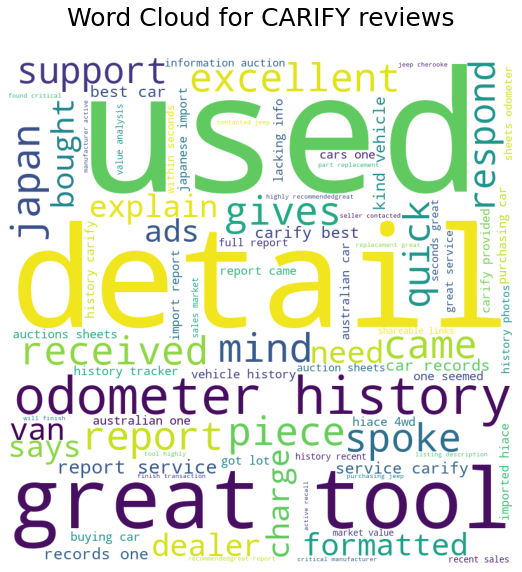

In [287]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")

plt.title("Word Cloud for CARIFY reviews", fontsize=25, y=1.05)
plt.tight_layout()
plt.show()